# DMBI PROJECT

### Read Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

In [9]:
recipes = pd.read_csv("/content/drive/My Drive/BIL PROJECT/recipes.csv")
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

<hr>

### Data Cleaning

In [0]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

<hr>

### Data Exploration

Let's count the ingredients across all recipes.

In [0]:
# sum each column
ing = recipes.iloc[:, 1:].sum(axis=0)

In [12]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

                  ingredient  count
0                     almond   2306
1                   angelica      1
2                      anise    223
3                 anise_seed     87
4                      apple   2422
5               apple_brandy     37
6                    apricot    620
7                   armagnac     11
8                  artemisia     13
9                  artichoke    391
10                 asparagus    460
11                   avocado    660
12                     bacon   2169
13              baked_potato      9
14                      balm      3
15                    banana    989
16                    barley    266
17             bartlett_pear     23
18                     basil   3842
19                       bay   1463
20                      bean   1992
21                     beech      1
22                      beef   4902
23                beef_broth    845
24                beef_liver     10
25                      beer    307
26                      beet

In [13]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

          ingredient  count
0                egg  21025
1              wheat  20781
2             butter  20719
3              onion  18080
4             garlic  17353
..               ...    ...
378   strawberry_jam      1
379  sturgeon_caviar      1
380      kaffir_lime      1
381            beech      1
382           durian      0

[383 rows x 2 columns]


In [14]:
recipes.corr(method ='pearson') 

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
almond,1.000000,-0.000854,0.011469,0.026238,0.002517,0.008786,0.066169,-0.002832,-0.003079,-0.010471,-0.000477,-0.012078,-0.021465,-0.002562,-0.001479,-0.005270,-0.002202,0.013636,-0.042722,-0.025204,-0.023278,-0.000854,-0.054894,-0.022796,-0.002700,-0.012569,-0.004688,-0.043910,-0.002259,0.019906,0.010579,-0.018121,-0.002832,-0.004678,-0.058363,0.005100,0.008154,-0.002461,0.005177,-0.001708,-0.003117,0.012141,-0.

<hr>

## Classification



### Decision Tree

In [0]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from statistics import mean

import matplotlib.pyplot as plt

#!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

To evaluate our model of Asian and Indian cuisines, we will split our dataset into a training set and a test set. We will build the decision tree using the training set. Then, we will test the model on the test set and compare the cuisines that the model predicts to the actual cuisines. 

In [0]:
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
ingredients = asian_indian_recipes.iloc[:,1:]
cuisines = asian_indian_recipes["cuisine"]
X_train, X_test, y_train, y_test = train_test_split(ingredients, cuisines, test_size=0.3, random_state=3)


In [33]:
bamboo_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

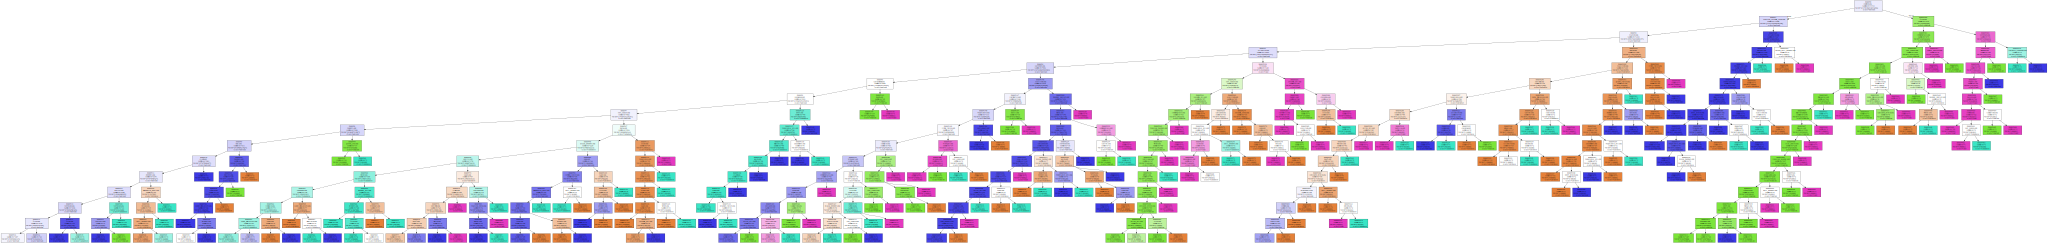

In [34]:
export_graphviz(bamboo_tree,
                feature_names=list(X_train.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(y_train),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

In [0]:
yhat = bamboo_tree.predict(X_test)

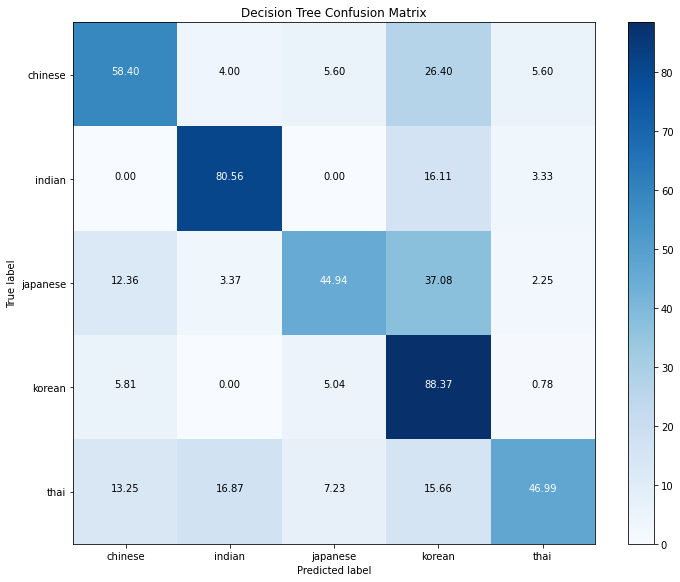

In [36]:
test_cuisines = np.unique(y_test)
bamboo_confusion_matrix = confusion_matrix(y_test, yhat, test_cuisines)
title = 'Decision Tree Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(10,8))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim(-0.5, 5-0.5)
plt.ylim(5-0.5, -0.5)

plt.show()

In [37]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

     chinese       0.66      0.58      0.62       125
      indian       0.87      0.81      0.84       180
    japanese       0.61      0.45      0.52        89
      korean       0.68      0.88      0.77       258
        thai       0.70      0.47      0.56        83

    accuracy                           0.71       735
   macro avg       0.70      0.64      0.66       735
weighted avg       0.72      0.71      0.71       735



In [38]:
print("F1-score: ",f1_score(y_test, yhat, average='weighted'))
print("Jaccard: ",jaccard_similarity_score(y_test, yhat))

F1-score:  0.705664599489884
Jaccard:  0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [39]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.7142857142857143


In [0]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    bamboo_tree = tree.DecisionTreeClassifier(max_depth=15)
    bamboo_tree.fit(X_train,y_train)
    yhat=bamboo_tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.71156463, 0.72380952, 0.7170068 , 0.71428571, 0.7170068 ,
       0.71292517, 0.7170068 , 0.7170068 , 0.71292517])

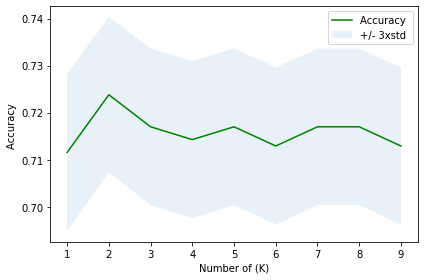

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7238095238095238 with k= 2


<hr>

### SVM

In [41]:
X_train, X_test, y_train, y_test = train_test_split( ingredients, cuisines, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1958, 383) (1958,)
Test set: (490, 383) (490,)


In [0]:
from sklearn import svm
import itertools


In [42]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['chinese', 'korean', 'indian', 'thai', 'chinese'], dtype=object)

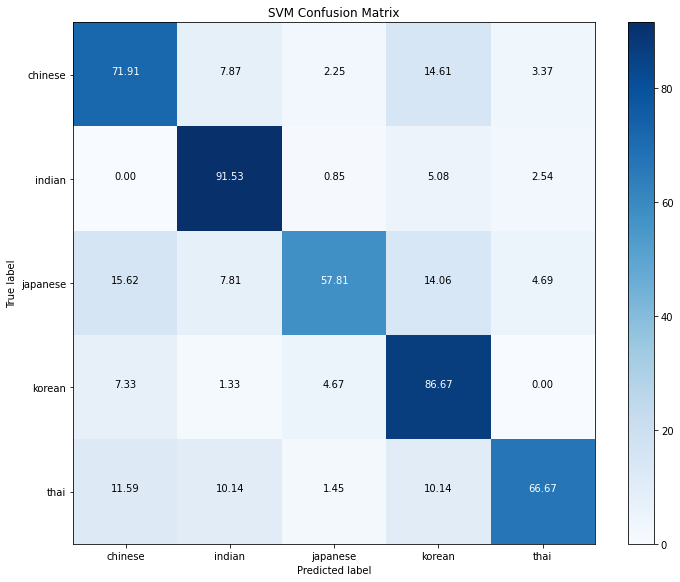

In [44]:
test_cuisines = np.unique(y_test)
svm_confusion_matrix = confusion_matrix(y_test, yhat, test_cuisines)
title = 'SVM Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(10,8))
svm_confusion_matrix = (
    svm_confusion_matrix.astype('float') / svm_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(svm_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = svm_confusion_matrix.max() / 2.
for i, j in itertools.product(range(svm_confusion_matrix.shape[0]), range(svm_confusion_matrix.shape[1])):
    plt.text(j, i, format(svm_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if svm_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim(-0.5, 5-0.5)
plt.ylim(5-0.5, -0.5)

plt.show()

In [45]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

     chinese       0.69      0.72      0.70        89
      indian       0.84      0.92      0.87       118
    japanese       0.77      0.58      0.66        64
      korean       0.79      0.87      0.83       150
        thai       0.84      0.67      0.74        69

    accuracy                           0.79       490
   macro avg       0.78      0.75      0.76       490
weighted avg       0.79      0.79      0.78       490



In [46]:
print("F1-score: ",f1_score(y_test, yhat, average='weighted'))
print("Jaccard: ",jaccard_similarity_score(y_test, yhat))

F1-score:  0.7817805642378596
Jaccard:  0.7857142857142857


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:  0.7857142857142857


<hr>

### KNN

In [0]:
X_train, X_test, y_train, y_test = train_test_split( ingredients, cuisines, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1958, 383) (1958,)
Test set: (490, 383) (490,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['chinese', 'indian', 'indian', 'korean', 'chinese'], dtype=object)

In [0]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8304392236976507
Test set Accuracy:  0.710204081632653


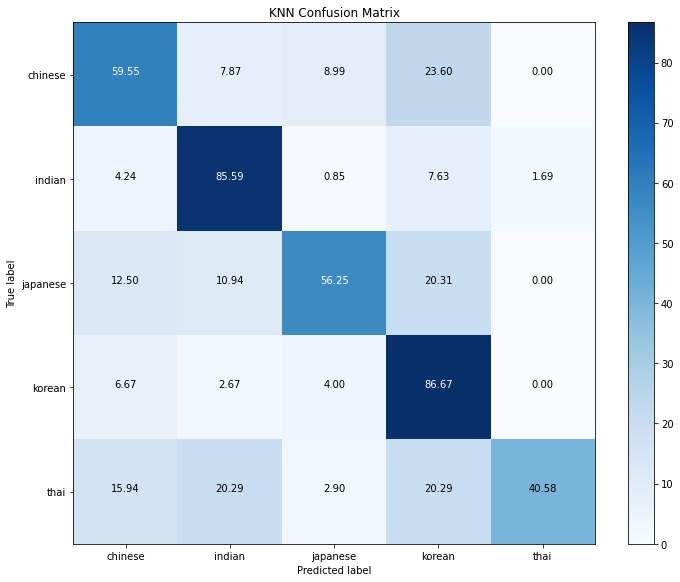

In [0]:
test_cuisines = np.unique(y_test)
knn_confusion_matrix = confusion_matrix(y_test, yhat, test_cuisines)
title = 'KNN Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(10,8))
knn_confusion_matrix = (
    knn_confusion_matrix.astype('float') / knn_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = knn_confusion_matrix.max() / 2.
for i, j in itertools.product(range(knn_confusion_matrix.shape[0]), range(knn_confusion_matrix.shape[1])):
    plt.text(j, i, format(knn_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if knn_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xlim(-0.5, 5-0.5)
plt.ylim(5-0.5, -0.5)

plt.show()

In [0]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

     chinese       0.61      0.60      0.60        89
      indian       0.76      0.86      0.80       118
    japanese       0.68      0.56      0.62        64
      korean       0.70      0.87      0.77       150
        thai       0.93      0.41      0.57        69

    accuracy                           0.71       490
   macro avg       0.74      0.66      0.67       490
weighted avg       0.73      0.71      0.70       490



In [0]:
print("F1-score: ",f1_score(y_test, yhat, average='weighted'))
print("Jaccard: ",jaccard_similarity_score(y_test, yhat))

F1-score:  0.6994047704813163
Jaccard:  0.710204081632653


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, yhat))

KNN's Accuracy:  0.710204081632653


In [0]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68367347, 0.70408163, 0.70204082, 0.71020408, 0.69387755,
       0.70612245, 0.71020408, 0.71428571, 0.68163265])

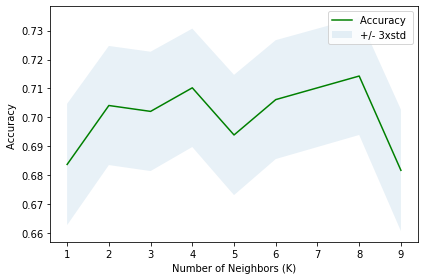

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7142857142857143 with k= 8


<hr>

### Comparing Classfication Algorithms

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.618826 (0.207083)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


DTC: 0.611489 (0.162242)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.711129 (0.213732)


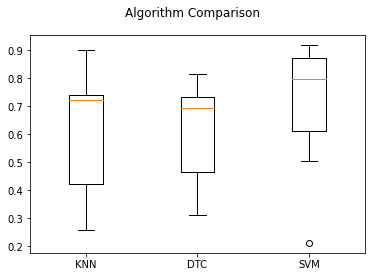

In [49]:
from sklearn import model_selection
from sklearn.svm import SVC
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, ingredients, cuisines, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

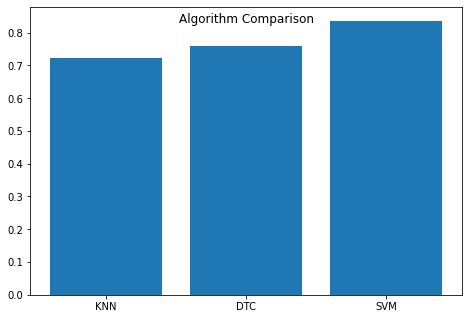

In [50]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_axes([0,0,1,1])
langs = ['KNN', 'DTC', 'SVM']
knn=results[0]
dtc=results[1]
svm=results[2]
res = [knn[0], dtc[0], svm[0]]
ax.bar(langs,res)
plt.show()

<hr>

## Clustering


### Agglomerative Hierarchical

In [0]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [0]:
X = ingredients
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [0]:
#Reducing the dimensionality of the Data
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

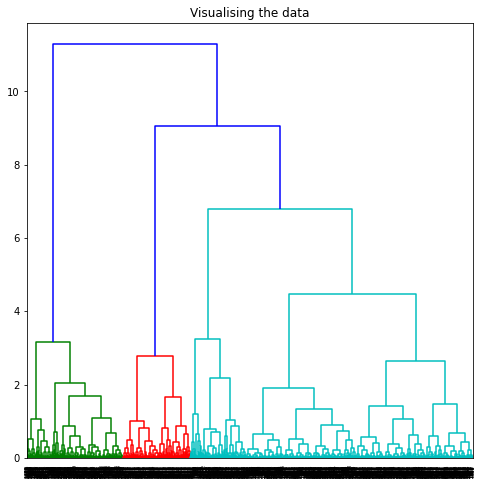

In [0]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

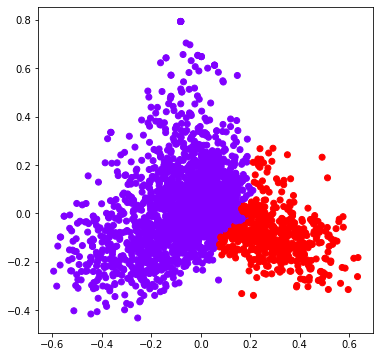

In [0]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

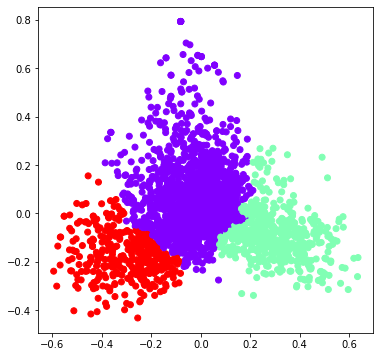

In [0]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

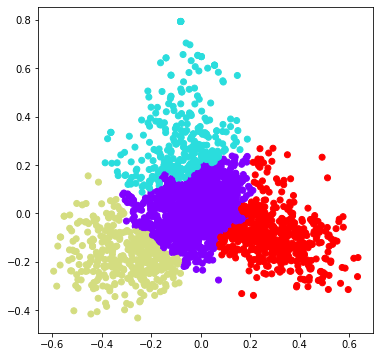

In [0]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

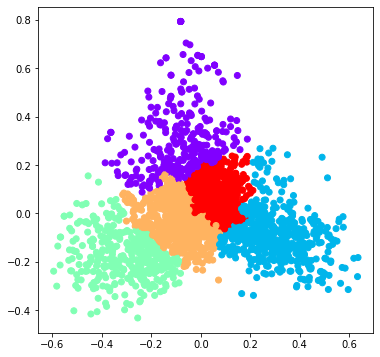

In [0]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

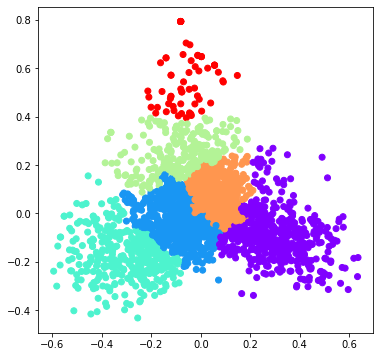

In [0]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

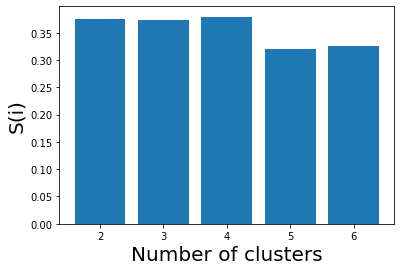

In [0]:
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

### K-means

In [0]:
from sklearn.cluster import KMeans 

In [0]:
from sklearn.preprocessing import StandardScaler
X=testa.values[:,1:]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.13684514,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966,  0.91494661],
       [ 7.30753036,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966, -0.34477741],
       [-0.13684514,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966, -0.34477741],
       ...,
       [-0.13684514,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966, -0.34477741],
       [-0.13684514,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966, -0.34477741],
       [-0.13684514,  0.        , -0.02021543, ..., -0.25092101,
        -0.09301966, -0.34477741]])

In [0]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [0]:
df = testa
df["km_clust"] = labels
df.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,cluster_,km_clust
0,indian,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [0]:
df.groupby('km_clust').mean()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,cluster_
km_clust,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.025203,0.0,

In [0]:
X

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

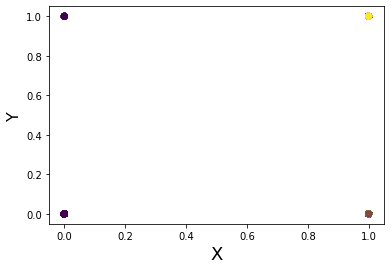

In [0]:
plt.scatter(testa['garlic'], testa['ginger'], c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)

plt.show()


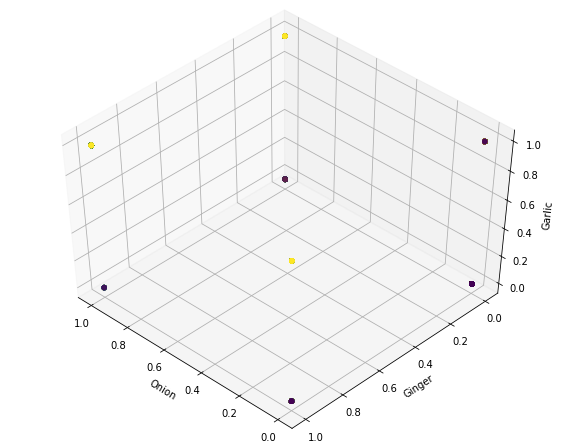

In [0]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Onion')
ax.set_ylabel('Ginger')
ax.set_zlabel('Garlic')
ax.scatter(testa['onion'], testa['ginger'], testa['garlic'], c= labels.astype(np.float))


<hr>


### DBSCAN



In [0]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [0]:
X = ingredients
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [53]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head()

,P1,P2
0,0.195495,-0.088071
1,0.117510,0.123845
2,0.092011,0.255599
3,0.131643,-0.064940
4,0.244223,0.031907


In [54]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_
labels1 

array([-1,  0, -1, ...,  0,  0,  0])

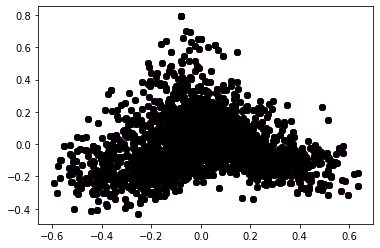

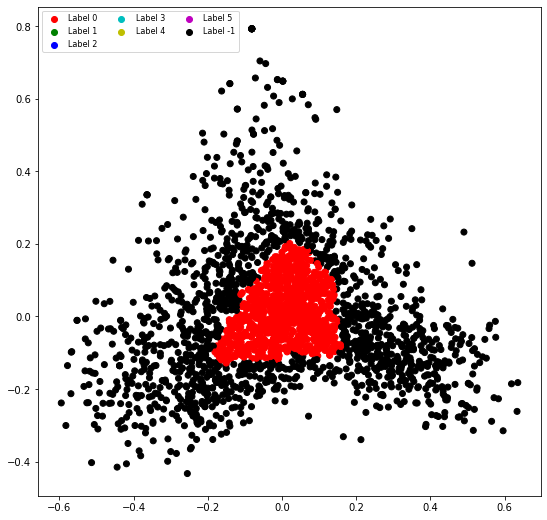

In [55]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k),('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4','Label 5', 'Label -1'),scatterpoints = 1,loc ='upper left',ncol = 3,fontsize = 8) 
plt.show() 

<hr>

## Association


### Apriopri

In [0]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [0]:
ing1 = (testa[testa['cuisine'] =="indian"].groupby(['cluster_','km_clust'])).mean()
ing1

almond  angelica  anise  anise_seed     apple  \
cluster_ km_clust                                                    
0        0         0.045627       0.0    0.0    0.003802  0.011407   
         1         0.000000       0.0    0.0    0.000000  0.000000   
         2         0.250000       0.0    0.0    0.000000  0.000000   
1        0         0.000000       0.0    0.0    0.000000  0.100000   
         1         0.034014       0.0    0.0    0.006803  0.051020   
         2         0.000000       0.0    0.0    0.000000  0.000000   
2        1         0.000000       0.0    0.0    0.000000  0.000000   
4        1         0.000000       0.0    0.0    0.000000  0.000000   
5        1         0.142857       0.0    0.0    0.000000  0.000000   

                   apple_brandy   apricot  armagnac  artemisia  artichoke  \
cluster_ km_clust                                                           
0        0                  0.0  0.015209       0.0        0.0        0.0   
         1                  0.0  0.000000       0.0        0.0        0.0   
         2                  0.0  0.000000       0.0        0.0        0.0   
1        0                  0.0  0.000000       0.0        0.0        0.0   
         1                  0.0  0.013605       0.0        0.0        0.0   
         2                  0.0  0.000000       0.0        0.0        0.0   
2        1                  0.0  0.000000       0.0        0.0        0.0   
4        1                  0.0  0.000000       0.0        0.0        0.0   
5        1                  0.0  0.000000       0.0        0.0        0.0   

                   asparagus  avocado     bacon  baked_potato  balm    banana  \
cluster_ km_clust                                                               
0        0          0.000000      0.0  0.003802           0.0   0.0  0.007605   
         1          0.000000      0.0  0.000000           0.0   0.0  0.000000   
         2          0.000000      0.0  0.000000           0.0   0.0  0.000000   
1        0          0.000000      0.0  0.000000           0.0   0.0  0.000000   
         1          0.006803      0.0  0.000000           0.0   0.0  0.010204   
         2          0.000000      0.0  0.000000           0.0   0.0  0.000000   
2        1          0.000000      0.0  0.000000           0.0   0.0  0.000000   
4        1          1.000000      0.0  0.000000           0.0   0.0  0.000000   
5        1          0.000000      0.0  0.000000           0.0   0.0  0.000000   

                     barley  bartlett_pear     basil       bay      bean  \
cluster_ km_clust                                                          
0        0         0.007605            0.0  0.007605  0.034221  0.015209   
         1         0.000000            0.0  0.000000  0.000000  0.111111   
         2         0.000000            0.0  0.000000  0.000000  0.000000   
1        0         0.000000            0.0  0.000000  0.100000  0.300000   
         1         0.003401            0.0  0.006803  0.078231  0.017007   
         2         0.000000            0.0  0.000000  0.000000  0.000000   
2        1         0.000000            0.0  0.000000  0.555556  0.000000   
4        1         0.000000            0.0  0.000000  0.000000  0.000000   
5        1         0.000000            0.0  0.000000  0.000000  0.142857   

                   beech      beef  beef_broth  beef_liver  beer      beet  \
cluster_ km_clust                                                            
0        0           0.0  0.007605    0.003802         0.0   0.0  0.003802   
         1           0.0  0.111111    0.000000         0.0   0.0  0.000000   
         2           0.0  0.000000    0.000000         0.0   0.0  0.000000   
1        0           0.0  0.000000    0.000000         0.0   0.0  0.100000   
         1           0.0  0.030612    0.010204         0.0   0.0  0.000000   
         2           0.0  0.000000    0.000000         0.0   0.0  0.000000   
2        1           0.0  0.000000    0.000000   

In [0]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
encoded = ing1.applymap(hot_encode) 
ing1 = encoded 

In [0]:
frq_items = apriori(ingredients, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1580,"(fenugreek, cumin)","(turmeric, coriander)",0.097631,0.129493,0.097631,1.0,7.722397,0.084988,inf
1966,"(fenugreek, cumin, pepper)","(turmeric, coriander)",0.096814,0.129493,0.096814,1.0,7.722397,0.084277,inf
1960,"(fenugreek, coriander, pepper)","(turmeric, cumin)",0.096814,0.138889,0.096814,1.0,7.200000,0.083367,inf
1963,"(fenugreek, turmeric, pepper)","(cumin, coriander)",0.096814,0.145016,0.096814,1.0,6.895775,0.082774,inf
773,"(fenugreek, coriander)",(turmeric),0.098856,0.159314,0.098856,1.0,6.276923,0.083107,inf
